In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/sample.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv
/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv


# Data loading

In [2]:
train_data=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/train.csv")
mvdata=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/movies.csv")
test_data=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv")


# EDA

In [3]:
train_data.head()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...,POSITIVE
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...,NEGATIVE
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...,POSITIVE
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li...",POSITIVE
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...,POSITIVE


In [4]:
train_data.describe()

,movieid,reviewerName,isFrequentReviewer,reviewText,sentiment
count,162758,162758,162758,156311,162758
unique,16812,4482,2,155071,2
top,escape_the_terminator_tyler_durden_astonish,Sherri Morrison,False,Parental Content Review,POSITIVE
freq,708,962,113189,29,108761


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162758 entries, 0 to 162757
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   movieid             162758 non-null  object
 1   reviewerName        162758 non-null  object
 2   isFrequentReviewer  162758 non-null  bool  
 3   reviewText          156311 non-null  object
 4   sentiment           162758 non-null  object
dtypes: bool(1), object(4)
memory usage: 5.1+ MB


In [6]:
train_data['sentiment'].value_counts()

POSITIVE    108761
NEGATIVE     53997
Name: sentiment, dtype: int64

(array([108761.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  53997.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

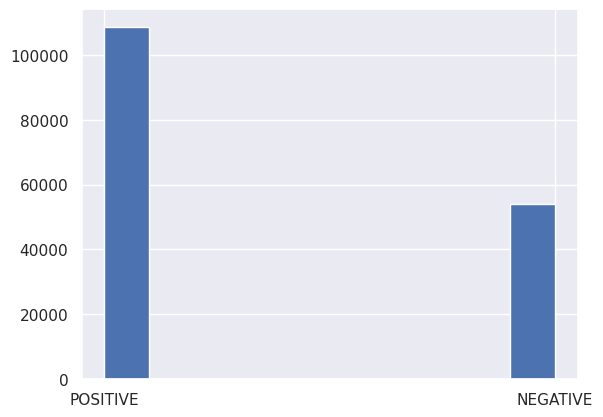

In [7]:
import seaborn as sbn
import matplotlib.pyplot as plt
sbn.set()
plt.hist(train_data['sentiment'])

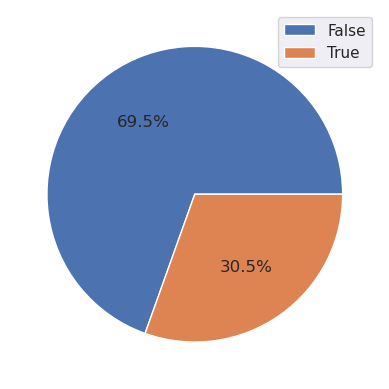

In [8]:
sbn.set()
counts=train_data['isFrequentReviewer'].value_counts()
plt.pie(counts,autopct='%.1f%%')
plt.legend(labels=['False','True'],loc='best')
plt.show()

In [9]:
mvdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143258 entries, 0 to 143257
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   movieid               143258 non-null  object 
 1   title                 143258 non-null  object 
 2   audienceScore         73248 non-null   float64
 3   rating                13991 non-null   object 
 4   ratingContents        13991 non-null   object 
 5   releaseDateTheaters   30773 non-null   object 
 6   releaseDateStreaming  79420 non-null   object 
 7   runtimeMinutes        129431 non-null  float64
 8   genre                 132175 non-null  object 
 9   originalLanguage      129400 non-null  object 
 10  director              143258 non-null  object 
 11  boxOffice             14743 non-null   object 
 12  distributor           23005 non-null   object 
 13  soundType             15917 non-null   object 
dtypes: float64(2), object(12)
memory usage: 15.3+ MB


In [10]:
test_data=pd.read_csv("/kaggle/input/sentiment-prediction-on-movie-reviews/test.csv")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55315 entries, 0 to 55314
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movieid       55315 non-null  object
 1   reviewerName  55315 non-null  object
 2   isTopCritic   55315 non-null  bool  
 3   reviewText    52805 non-null  object
dtypes: bool(1), object(3)
memory usage: 1.3+ MB


# Data preprocess

In [11]:
tr_data=train_data.dropna()
X=tr_data.drop(['sentiment'],axis=1)
y=tr_data['sentiment']

In [12]:
X[:2]

,movieid,reviewerName,isFrequentReviewer,reviewText
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...


In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,stratify=y, test_size=.001,random_state=1)

In [14]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((156154, 4), (157, 4), (156154,), (157,))

In [15]:
import re

def normalize(text):
    text=text.lower()
    text=re.sub(r'[^\w\s]', '', text)
    text=re.sub(r'\d', '', text)
    text=re.sub(r'\s+', ' ', text)
    text=text.strip()
    return text 

# def stem(text, min_length=5):
#     suffixes = ['ing', 'ly', 'ed', 'ious', 'ies', 'es', 's', 'ment']
#     pattern = r'(' + '|'.join(suffixes) + r')$'
#     words = text.split()
#     stemmed_words = []
#     for word in words:
#         if len(word) >= min_length:
#             word = re.sub(pattern, ' ', word)
#         stemmed_words.append(word)
#     stemmed_text = ' '.join(stemmed_words)
#     return stemmed_text


X_train['reviewText']=X_train['reviewText'].apply(lambda x: normalize(x))
X_test['reviewText']=X_test['reviewText'].apply(lambda x: normalize(x))
# X_train['reviewText']=X_train['reviewText'].apply(stem, min_length=5)
# X_test['reviewText']=X_test['reviewText'].apply(stem, min_length=5)
# X_train['reviewText']=X_train['reviewText'].apply(lambda x: stem(x))
# X_test['reviewText']=X_test['reviewText'].apply(lambda x: stem(x))

In [16]:
check_text = "    This is a checking text_with punctuation! And    extra       whitespaces. It also has 123 numbers."
normalized_text = normalize(check_text)
# stem_text = stem(normalized_text)

print(" check text:")
print(check_text)
print()
print("Normalized text:")
print(normalized_text)
# print(stem_text)

 check text:
    This is a checking text_with punctuation! And    extra       whitespaces. It also has 123 numbers.

Normalized text:
this is a checking text_with punctuation and extra whitespaces it also has numbers


In [17]:
# X_train['movieid'] = X_train['movieid'].str.replace('_', ' ', regex=True)
# X_test['movieid']=X_test['movieid'].str.replace('_', ' ', regex=True)

In [18]:
X[:5]

,movieid,reviewerName,isFrequentReviewer,reviewText
0,marvelous_pirate,Benjamin Henry,False,Henry Selick’s first movie since 2009’s Corali...
1,tony_montana_frodo_baggins_v_rocky_balboa,Felicia Lopez,False,With a cast that reads like the Vogue Oscar pa...
2,darth_vader_katniss_everdeen_sorcerer_donnie_d...,Mr. Charles Burgess,True,Creed II does not give us anything but another...
3,lara_croft_glimmer,Ryan Barrett,False,"I know what you're thinking, but this is no Li..."
4,jason_bourne_surreal_the_terminator_indiana_jones,Alexander Glover,False,Director Fernando Meirelles tells the story wi...


In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer

#countv=CountVectorizer(stop_words=['a','an','the','is','are'])
#countv.fit(review)
countv=CountVectorizer()
ctf = ColumnTransformer(
    transformers=[
        ('ordinal encoder', OrdinalEncoder(handle_unknown='use_encoded_value',unknown_value=3), ['isFrequentReviewer']),
        ('onehot encoder', OneHotEncoder(handle_unknown='ignore'), ['reviewerName']),
        ('count vec1', countv , 'reviewText'),
        ('count vec2', OneHotEncoder(handle_unknown='ignore'), ['movieid'])
    ])

ctf.fit(X_train)

ColumnTransformer(transformers=[('ordinal encoder',
                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                unknown_value=3),
                                 ['isFrequentReviewer']),
                                ('onehot encoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['reviewerName']),
                                ('count vec1', CountVectorizer(), 'reviewText'),
                                ('count vec2',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['movieid'])])

In [20]:
X_train_transformed = ctf.transform(X_train)
X_test_transformed = ctf.transform(X_test)

In [21]:
X_train_transformed.shape,X_test_transformed.shape

((156154, 109898), (157, 109898))

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
ctf1 = ColumnTransformer(
    transformers=[
        ('tfidf vec1',tfidf , 'reviewText'),
        ('tfidf ohe', OneHotEncoder(handle_unknown='ignore'), ['movieid','reviewerName','isFrequentReviewer'])
    ])

ctf1.fit(X_train)

ColumnTransformer(transformers=[('tfidf vec1', TfidfVectorizer(), 'reviewText'),
                                ('tfidf ohe',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['movieid', 'reviewerName',
                                  'isFrequentReviewer'])])

In [23]:
X_train_transformed1 = ctf1.transform(X_train)
X_test_transformed1 = ctf1.transform(X_test)
X_train_transformed1.shape,X_test_transformed1.shape

((156154, 109899), (157, 109899))

In [24]:
from sklearn.impute import SimpleImputer
si=SimpleImputer(strategy='most_frequent')

### Models

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score

lg1=LogisticRegression(max_iter=10000,solver='saga')
print("On countVectorizer")
lg1.fit(X_train_transformed,y_train)
lg1_pred=lg1.predict(X_test_transformed)
print("Accuracy_score:",accuracy_score(lg1_pred,y_test),"F1_score:",f1_score(lg1_pred,y_test,pos_label='POSITIVE'))

print("===========================================================")

lg2=LogisticRegression(max_iter=5000,solver='saga')
print("tfidfVectorizer")
lg2.fit(X_train_transformed1,y_train)
lg2_pred=lg2.predict(X_test_transformed1)
print("Accuracy_score:",accuracy_score(lg2_pred,y_test),"F1_score:",f1_score(lg2_pred,y_test,pos_label='POSITIVE'))


On countVectorizer
Accuracy_score: 0.8280254777070064 F1_score: 0.8789237668161435
tfidfVectorizer
Accuracy_score: 0.8535031847133758 F1_score: 0.8940092165898618


In [26]:
from sklearn.pipeline import Pipeline

lg_pipe = Pipeline([
    ('preprocessor', ctf1),
    ('lg', lg1)
])


lg_pipe.fit(X_train, y_train)

lg_pipe_pred = lg_pipe.predict(X_test)
print("Accuracy_score:",accuracy_score(lg_pipe_pred,y_test),"F1_score:",f1_score(lg_pipe_pred,y_test,pos_label='POSITIVE'))


Accuracy_score: 0.8535031847133758 F1_score: 0.8940092165898618


In [27]:
'''from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='gini')
dtc.fit(X_train_transformed1,y_train)
dtc_pred=dtc.predict(X_test_transformed1)
accuracy_score(dtc_pred,y_test),f1_score(dtc_pred,y_test,pos_label='POSITIVE')'''

# output:(0.6756514692711221, 0.7627071047458578)

"from sklearn.tree import DecisionTreeClassifier\ndtc=DecisionTreeClassifier(criterion='gini')\ndtc.fit(X_train_transformed1,y_train)\ndtc_pred=dtc.predict(X_test_transformed1)\naccuracy_score(dtc_pred,y_test),f1_score(dtc_pred,y_test,pos_label='POSITIVE')"

In [28]:
from sklearn.naive_bayes import MultinomialNB

mnb1=MultinomialNB()
print("On countVectorizer")
mnb1.fit(X_train_transformed,y_train)
mnb1_pred=mnb1.predict(X_test_transformed)
print("Accuracy_score:",accuracy_score(mnb1_pred,y_test),"F1_score:",f1_score(mnb1_pred,y_test,pos_label='POSITIVE'))

print("===========================================================")

mnb2=MultinomialNB()
print("On tfidfVectorizer")
mnb2.fit(X_train_transformed1,y_train)
mnb2_pred=mnb2.predict(X_test_transformed1)
print("Accuracy_score:",accuracy_score(mnb2_pred,y_test),"F1_score:",f1_score(mnb2_pred,y_test,pos_label='POSITIVE'))


On countVectorizer
Accuracy_score: 0.8343949044585988 F1_score: 0.8761904761904762
On tfidfVectorizer
Accuracy_score: 0.8089171974522293 F1_score: 0.8695652173913043


In [29]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier

sgd_param = {
    'loss': ['hinge', 'log_loss', 'modified_huber'],
    'penalty': ['l2', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'max_iter': [1000, 2000, 3000],
}

sgd=SGDClassifier(random_state=1)
sgd_grid_search = GridSearchCV(sgd, sgd_param, cv=5, scoring='accuracy')
sgd_grid_search.fit(X_train_transformed, y_train)'''


"from sklearn.model_selection import GridSearchCV\nfrom sklearn.linear_model import SGDClassifier\n\nsgd_param = {\n    'loss': ['hinge', 'log_loss', 'modified_huber'],\n    'penalty': ['l2', 'elasticnet'],\n    'alpha': [0.0001, 0.001, 0.01],\n    'max_iter': [1000, 2000, 3000],\n}\n\nsgd=SGDClassifier(random_state=1)\nsgd_grid_search = GridSearchCV(sgd, sgd_param, cv=5, scoring='accuracy')\nsgd_grid_search.fit(X_train_transformed, y_train)"

In [30]:
# best_params = sgd_grid_search.best_params_
# best_score = sgd_grid_search.best_score_
# print(best_params)
# print(best_score)

In [31]:
from sklearn.linear_model import SGDClassifier
sgd1=SGDClassifier(loss='modified_huber')
print("On countVectorizer")
sgd1.fit(X_train_transformed,y_train)
sgd1_pred=sgd1.predict(X_test_transformed)
print("Accuracy_score:",accuracy_score(sgd1_pred,y_test),"F1_score:",f1_score(sgd1_pred,y_test,pos_label='POSITIVE'))
print("===========================================================")

sgd2=SGDClassifier(loss='modified_huber')
print("On tfidfVectorizer")
sgd2.fit(X_train_transformed1,y_train)
sgd2_pred=sgd2.predict(X_test_transformed1)
print("Accuracy_score:",accuracy_score(sgd2_pred,y_test),"F1_score:",f1_score(sgd2_pred,y_test,pos_label='POSITIVE'))

On countVectorizer
Accuracy_score: 0.802547770700637 F1_score: 0.8571428571428572
On tfidfVectorizer
Accuracy_score: 0.8535031847133758 F1_score: 0.8949771689497716


In [32]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(sgd2_pred, y_test)
cm

array([[36,  7],
       [16, 98]])

In [33]:
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(lg2_pred, y_test)
cm1

array([[37,  8],
       [15, 97]])

<Axes: >

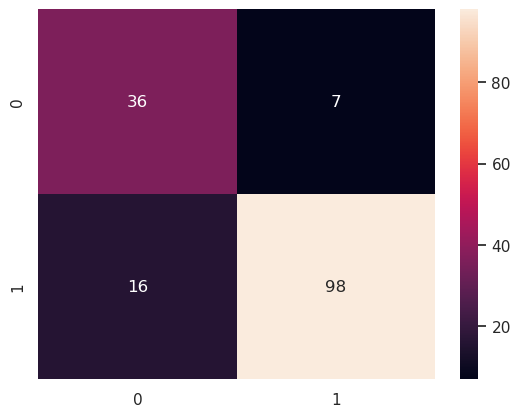

In [34]:
import seaborn as sbn
sbn.heatmap(cm, annot=True, fmt='g')

In [35]:
'''from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=3)

knn.fit(X_train_transformed1,y_train)

knn_pred=knn.predict(X_test_transformed1)
accuracy_score(knn_pred,y_test),f1_score(knn_pred,y_test,pos_label='POSITIVE')'''

"from sklearn.neighbors import KNeighborsClassifier\n\nknn=KNeighborsClassifier(n_neighbors=3)\n\nknn.fit(X_train_transformed1,y_train)\n\nknn_pred=knn.predict(X_test_transformed1)\naccuracy_score(knn_pred,y_test),f1_score(knn_pred,y_test,pos_label='POSITIVE')"

In [36]:
'''from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD

pipe = Pipeline([
    ('preprocessor', ctf1),
    ('pca', TruncatedSVD(n_components=10)),
    ('svc', SVC())
])


pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)'''

"from sklearn.pipeline import Pipeline\nfrom sklearn.svm import SVC\nfrom sklearn.decomposition import TruncatedSVD\n\npipe = Pipeline([\n    ('preprocessor', ctf1),\n    ('pca', TruncatedSVD(n_components=10)),\n    ('svc', SVC())\n])\n\n\npipe.fit(X_train, y_train)\n\ny_pred = pipe.predict(X_test)"

In [37]:
test_data['reviewText'] = si.fit_transform(test_data[['reviewText']])
test_data['reviewText']=test_data['reviewText'].apply(lambda x: normalize(x))
test_data['isFrequentReviewer']=test_data['isTopCritic']
test_data=test_data.drop(['isTopCritic'],axis=1)


In [38]:
test_data.shape

(55315, 4)

In [39]:
test_data_transformed=ctf1.transform(test_data)
test_data_transformed.shape

(55315, 109899)

In [40]:
prediction=sgd2.predict(test_data_transformed)

In [41]:
prediction[:10]

array(['POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE'],
      dtype='<U8')

Submission

In [42]:
submission=pd.DataFrame(columns=['id','sentiment'])
submission['id']=[i for i in range(len(prediction))]
submission['sentiment']=prediction
submission.to_csv('submission.csv',index=False)